In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Quantum_Kernel import *

%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit , transpile, Aer ,IBMQ
from qiskit.visualization import *
from qiskit.tools.jupyter import *
from qiskit.providers.ibmq import least_busy
from qiskit.providers.aer import QasmSimulator

from qiskit import Aer, QuantumCircuit
from qiskit.opflow import Z, I, StateFn
from qiskit.utils import QuantumInstance
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.algorithms.optimizers import *

from qiskit.opflow import StateFn, PauliSumOp, AerPauliExpectation, ListOp, Gradient
from qiskit_machine_learning.neural_networks import OpflowQNN
import qiskit.quantum_info as qi
from scipy import optimize
from qiskit.opflow.gradients import Gradient
from typing import Union

from IPython.display import clear_output
from scipy.optimize import approx_fprime


# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

# 1.Quantum Kernel Esitmator(QKE)

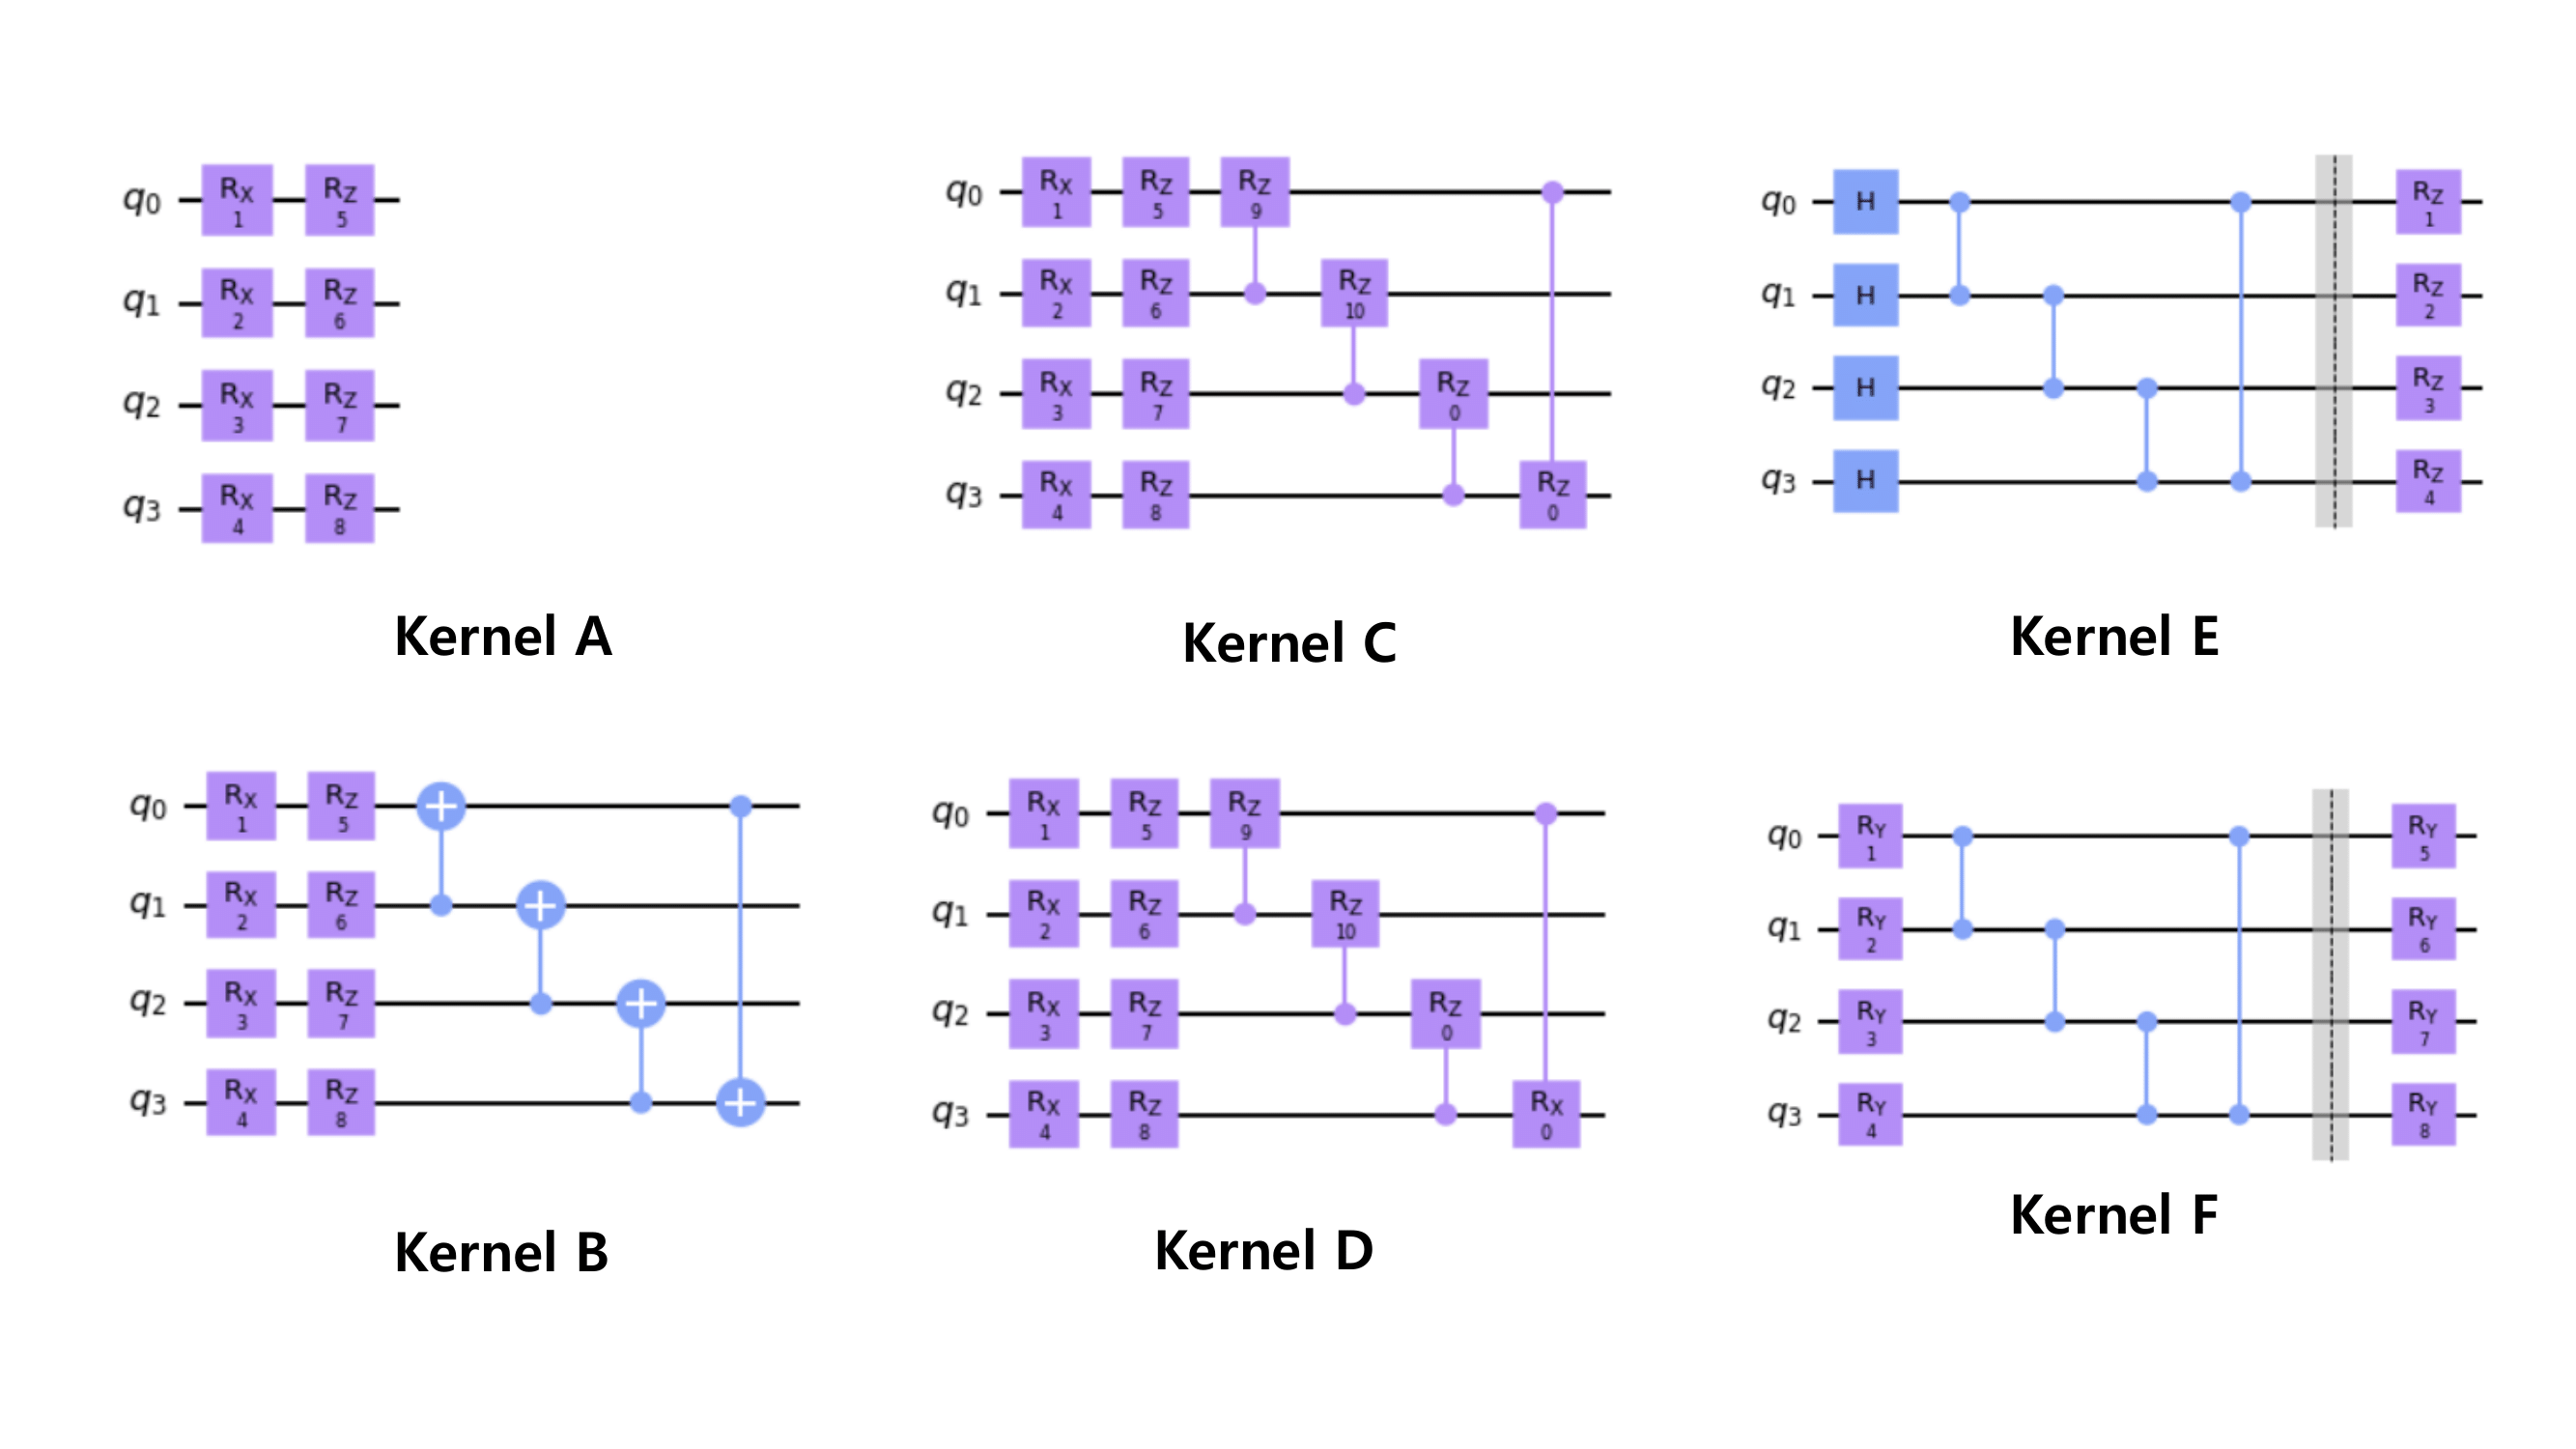

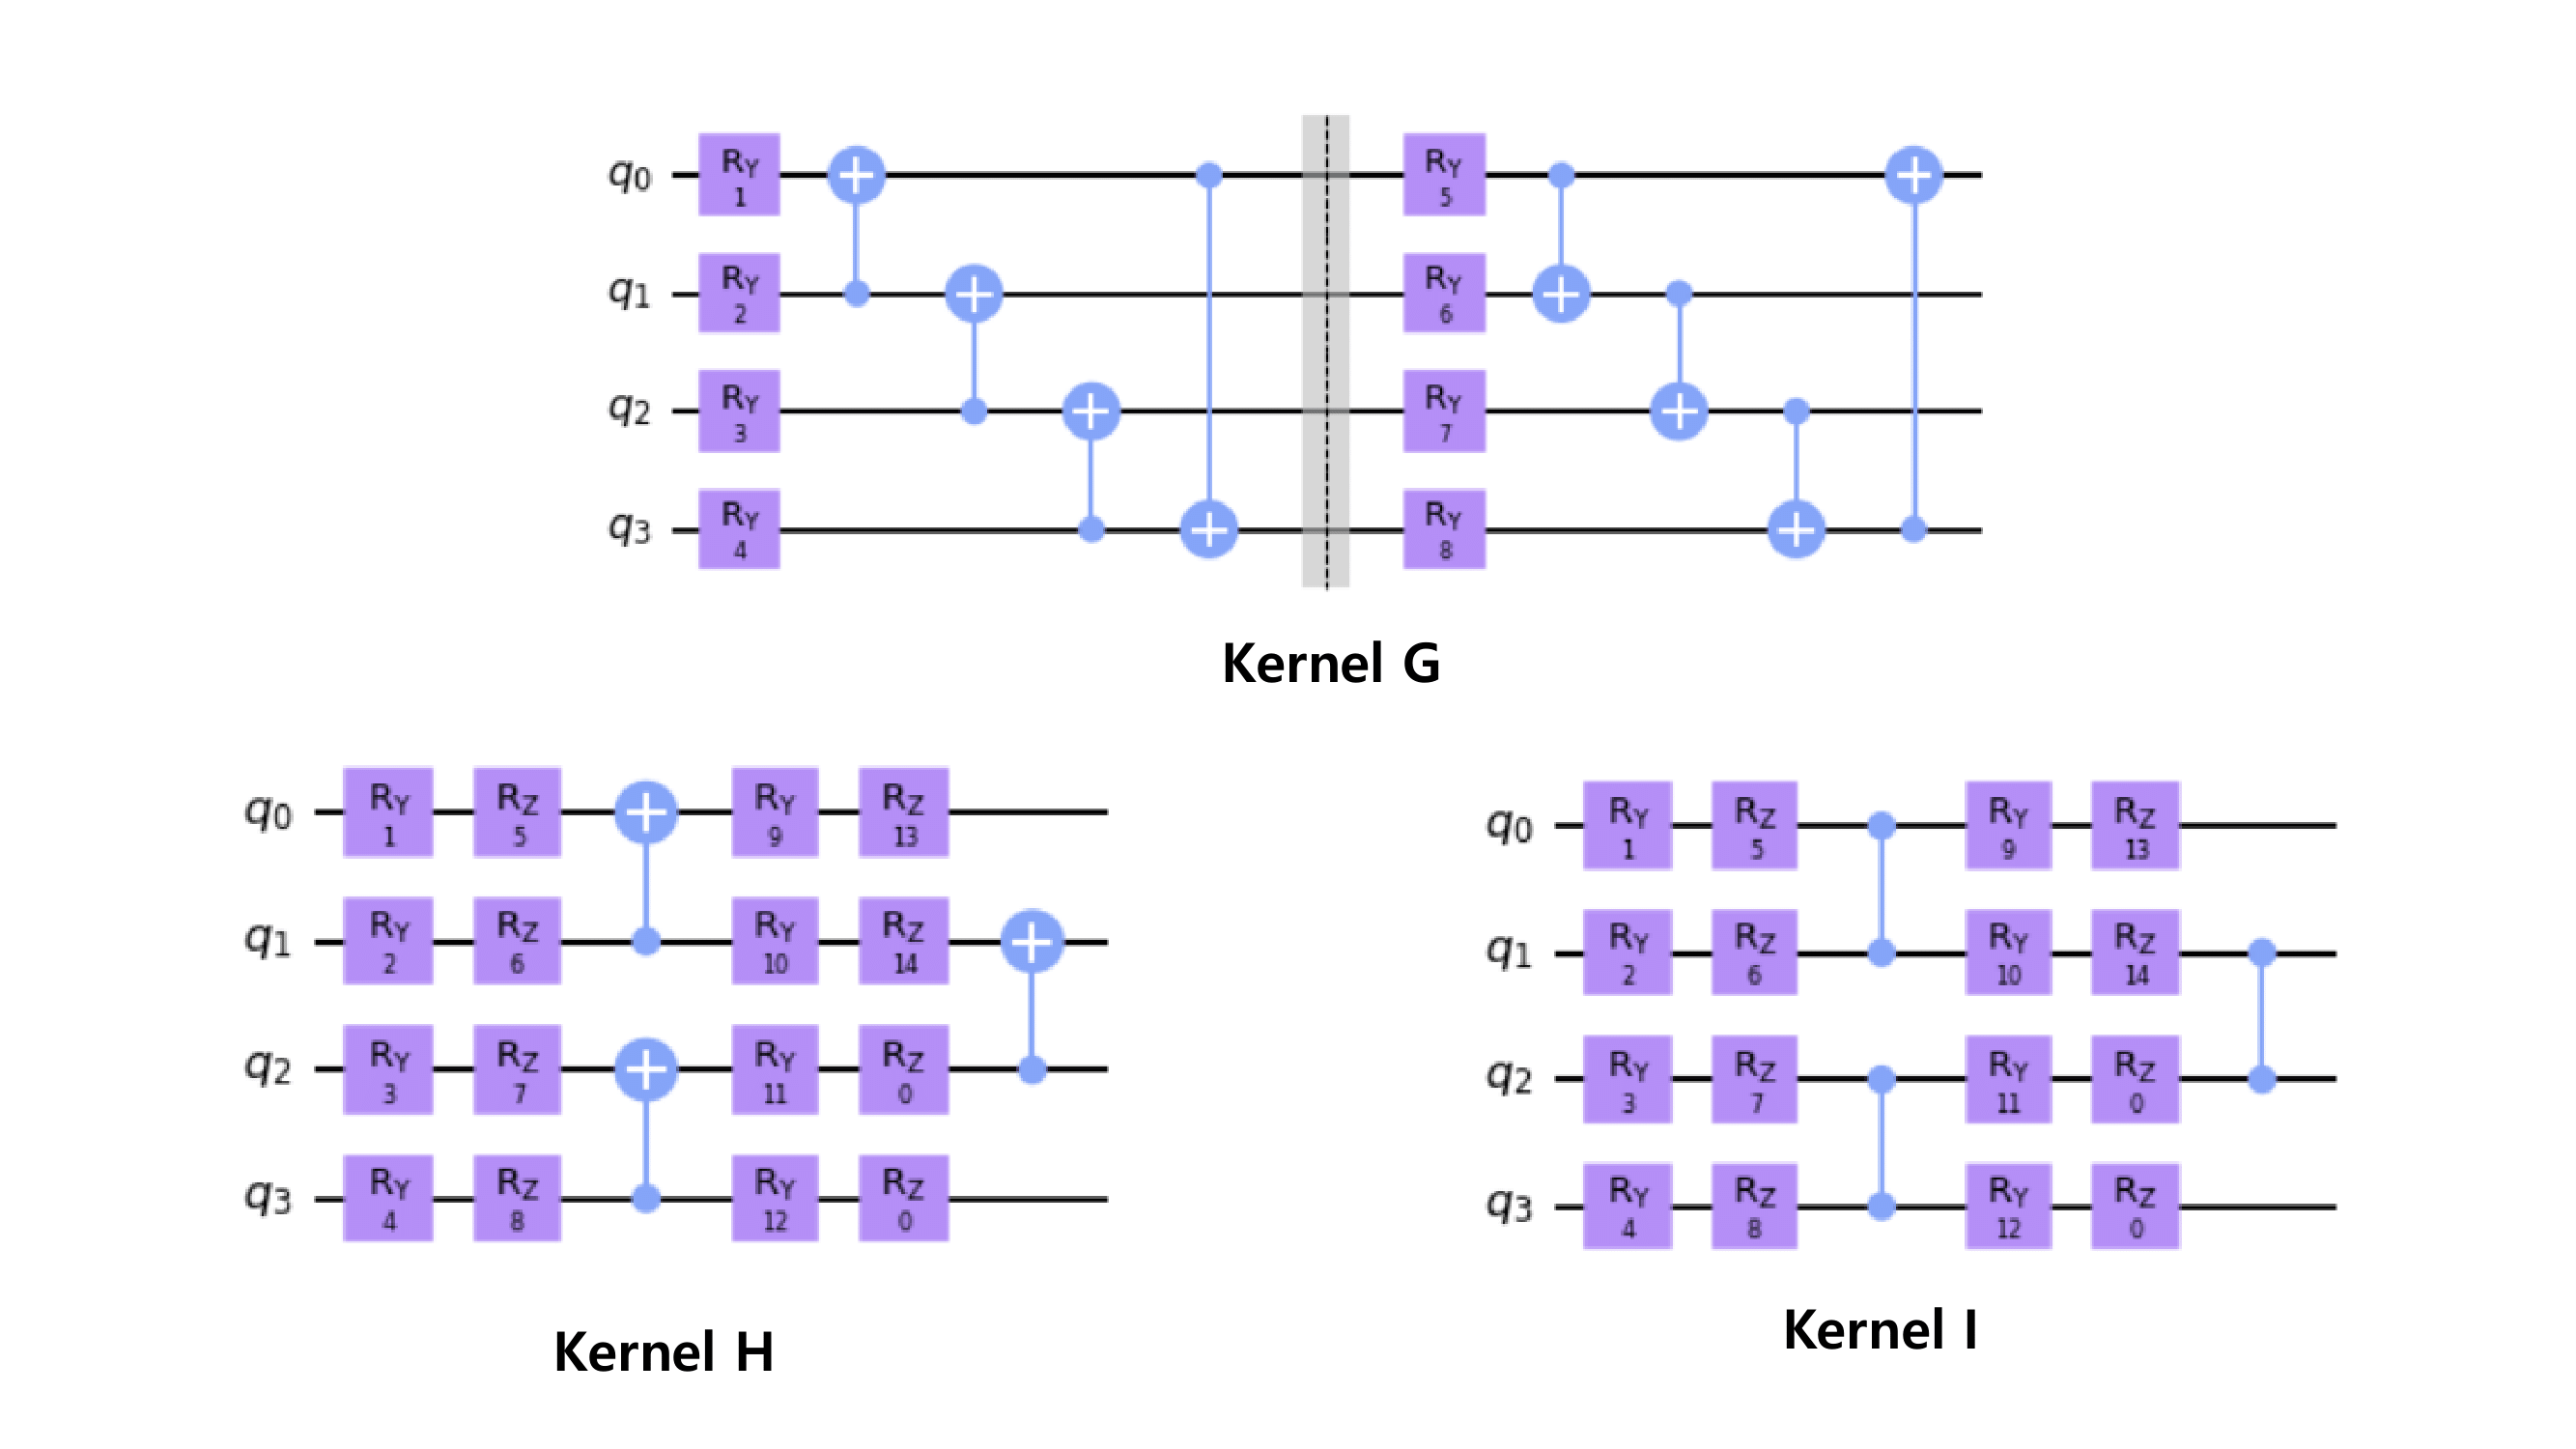

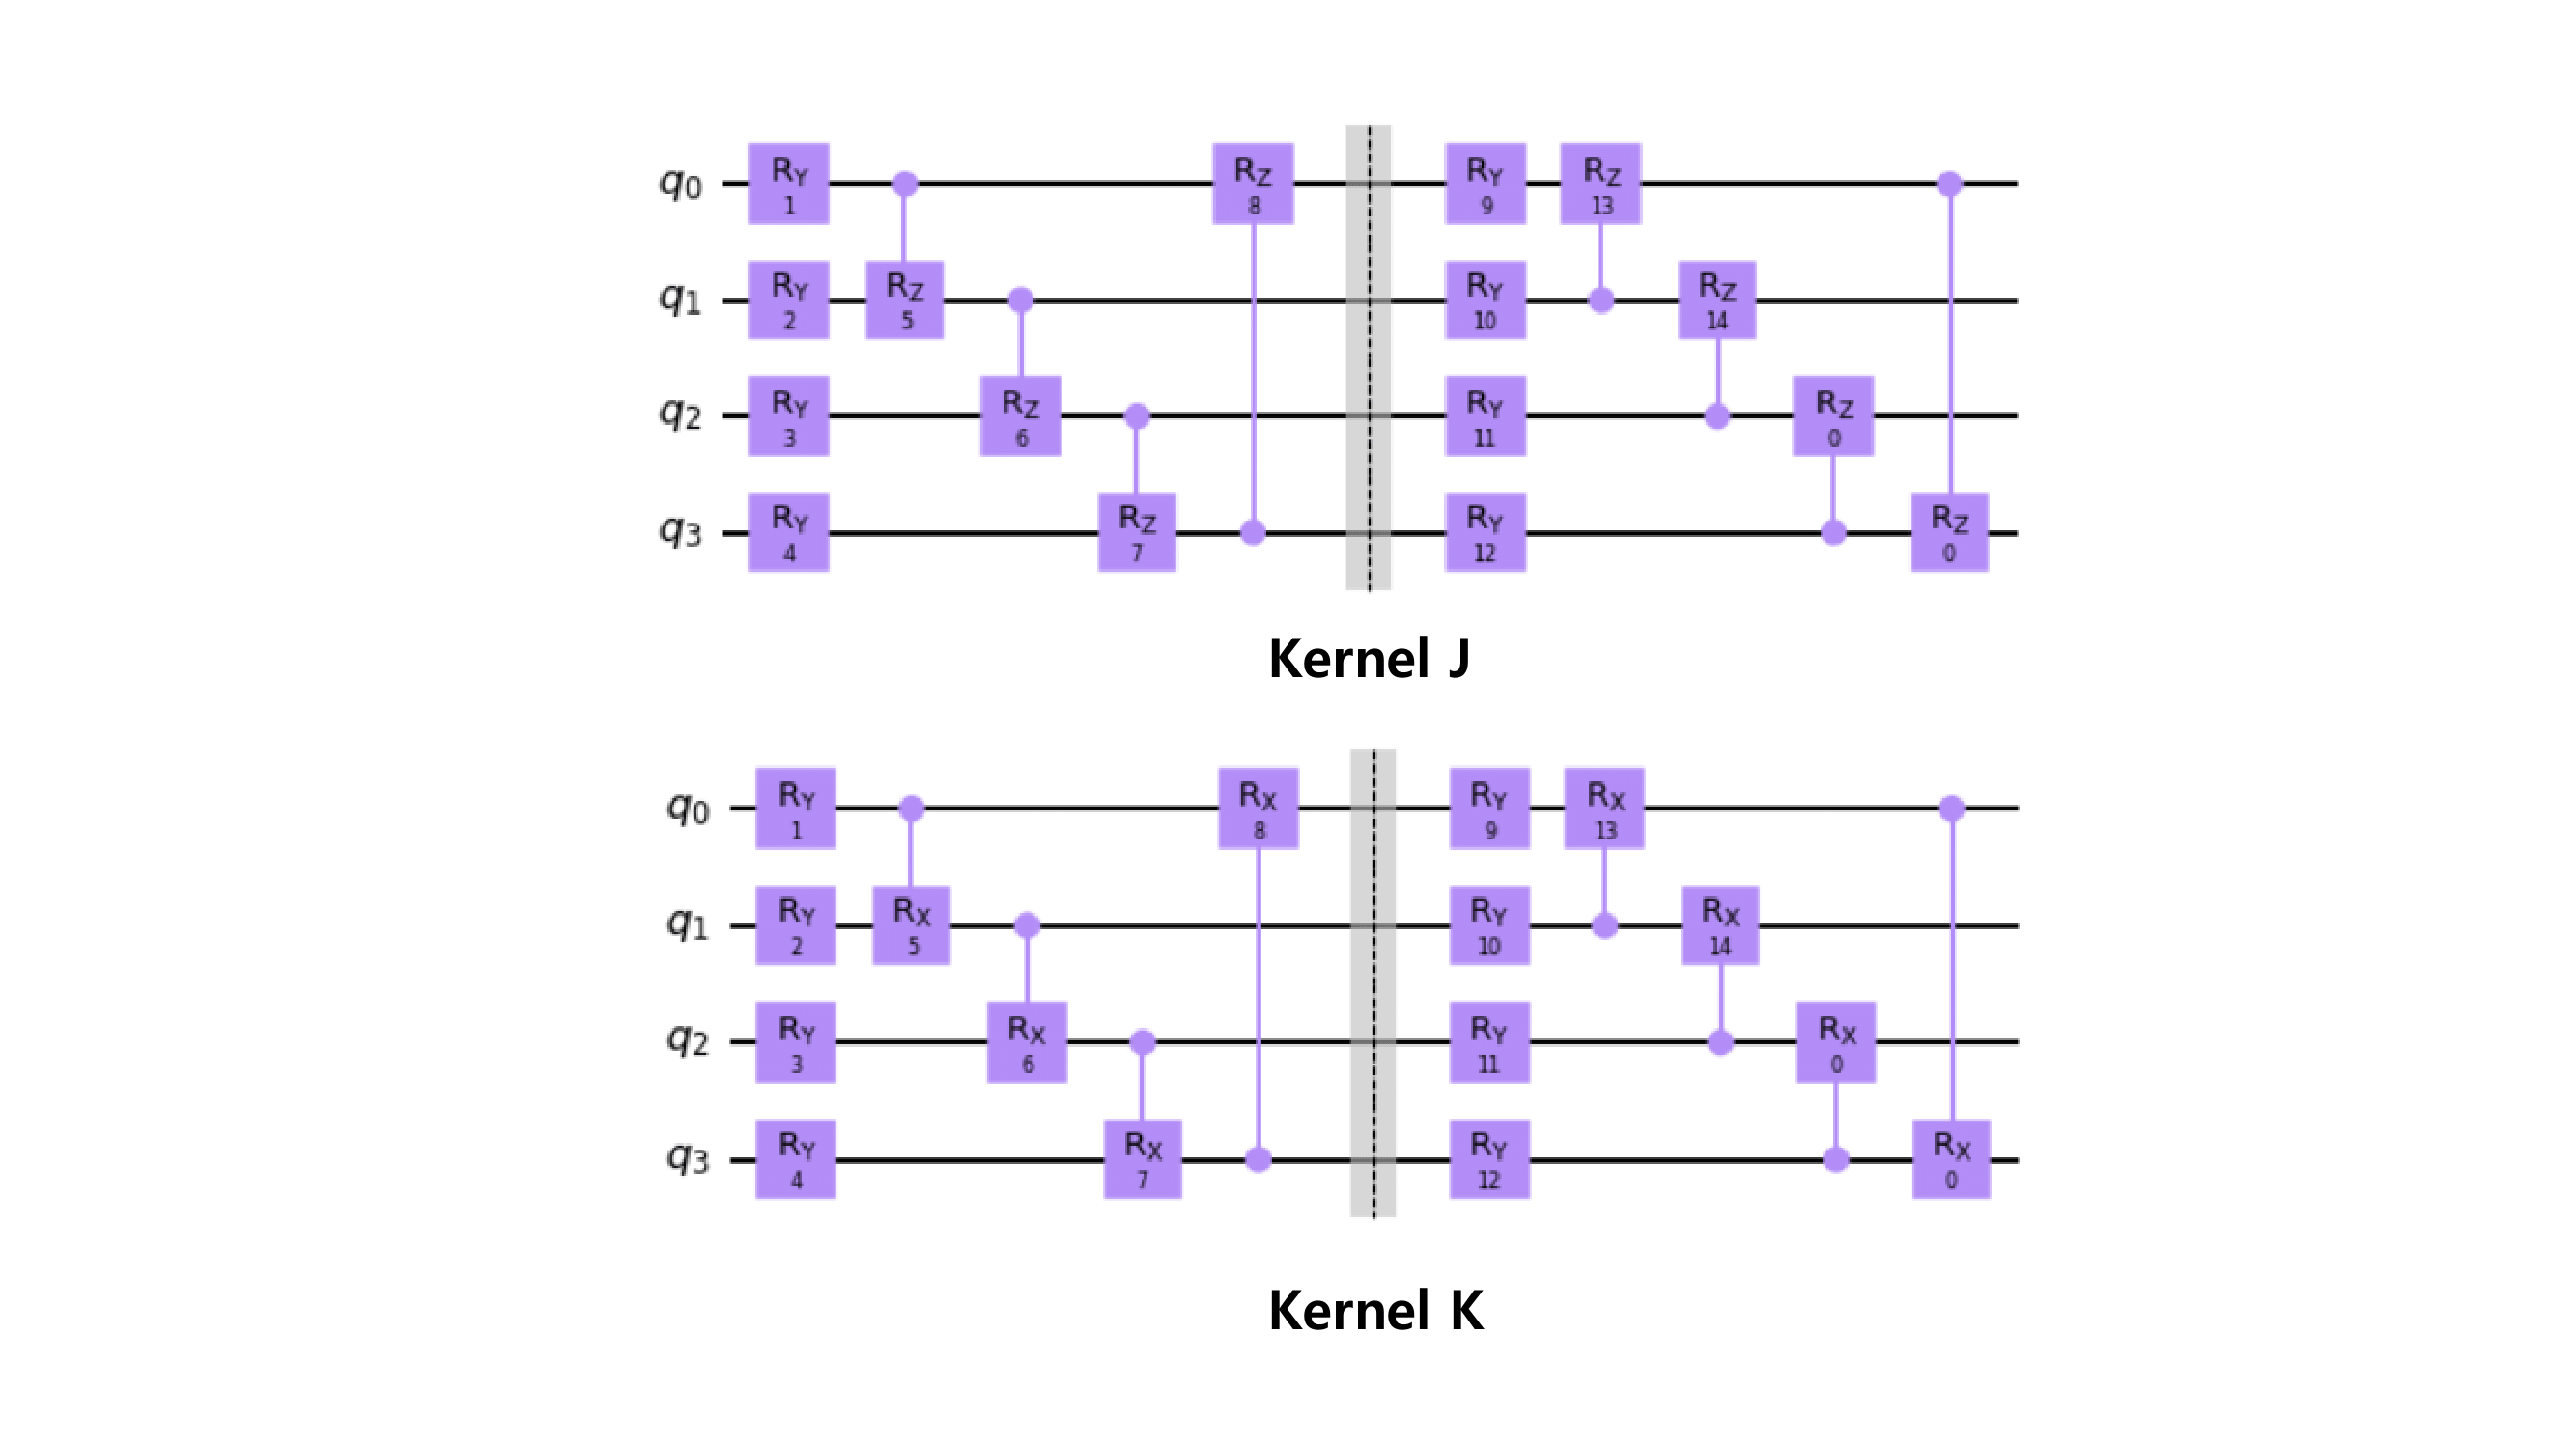

# 2. Generalized Sufficient Dimension Reduction(GSDR)

# 2.1 Quantum Kernel Esitmator

- **Gram_discrete(data,version="H")** 
  - Input :
    - data : Target Data
    - version : "H" for GSIR, "L" for GSAVE
  - return : numpy array
- **Gram_gaussian(data,comp,version="H")**
  - Input :
    - data : Target Data
    - comp : Hyperparameter for scaling
    - version : "H" for GSIR, "L" for GSAVE
  - return : numpy array

- **KPCA(Gram_X)** 
  - Input : 
    - Gram_X : Gram Matrix of X
  - return : List [SDR coefficient, eigenvalue]    

- **GSIR(Gram_y,Gram_X)** 
  - Input : 
    - Gram_y : Gram Matrix of Y 
    - Gram_X : Gram Matrix of X 
  - return : List [SDR coefficient, eigenvalue]    

- **GSAVE(Gram_y,Gram_X)** 
  - Input : 
    - Gram_y : Gram Matrix of Y 
    - Gram_X : Gram Matrix of X
  - return : List [SDR coefficient, eigenvalue]    

- **PCA(X)** 
  - Input : 
    - X : Target Data 
  - return : List [PCA coefficient, eigenvalue]
  
- **SIR(y,X,h)** 
  - Input : 
    - y : Y Label
    - X : Target Data
    - h : Numbers of Label/ Numbers of Slice
  - return : List [SDR coefficient, eigenvalue]

- **DR(y,X,h)** 
  - Input : 
    - y : Y Label
    - X : Target Data
    - h : Numbers of Label/ Numbers of Slice
  - return : List [SDR coefficient, eigenvalue]


- **get_gram(data,kernel_fun,dtype = "float")**
  - Input : 
    - data : Target Data
    - kernel_fun : Kernel Function or List of form \[Gate,Numbers of Qubit\]  
    - dtype : Target Data Type (Real: "float", Complex: "complex")  
  - return : \[numpy array\]

# 2.2 Quantum Kernel Esitmator - Supplement

- **kernel\_\[알파벳 A\~K 중 1\](Data)**  
  - Argument :  
    - Data : p \times 1 vector, Have to be scaled as $0~4\pi$ or $0~2\pi$
  - return : \[Gate,Number of Qubit\]  


- **swap\_test\(Data\_1,Data\_2,kernel\)**  
  - Argument :  
    - Data_1,Data_2 : p \times 1 vector, Have to be scaled as $0~4\pi$ or $0~2\pi$
    - kernel : Kernel Function or List of form \[Gate,Numbers of Qubit\]  
  - return : \[Circuit\]  


- **hadamard\_test\(Data\_1,Data\_2,kernel\)**  
  - Argument :  
    - Data_1,Data_2 : p \times 1 vector, Have to be scaled as $0~4\pi$ or $0~2\pi$
    - kernel : Kernel Function or List of form \[Gate,Numbers of Qubit\]  
  - return : \[Circuit\]  


- **quantum_inner\(method,Data_1,Data_2,kernel,shots=10000\)**  
  - Argument :  
    - Method : Estimation Methods, "hadamard" or "swap"  
    - Data_1,Data_2 :p \times 1 vector, Have to be scaled as $0~4\pi$ or $0~2\pi$  
    - kernel : Kernel Function or List of form \[Gate,Numbers of Qubit\]  
    - shots : Number of shots
  - return : \[Float\]


- **kernel_circuit(kernel,data)**
  - Argument : 
    - kernel : Kernel Function or List of form \[Gate,Numbers of Qubit\]  
    - data : P \times 1 vector or integer. If the input is Integer, returns the circuit with size as the integer
  - return : \[Circuit\]

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

np.random.seed(0)

bubble_data_X, bubble_data_y = make_circles(n_samples=400, factor=.3, noise=.05)
bubble_data_X = pd.DataFrame(bubble_data_X)

In [17]:
data = pd.DataFrame(bubble_data_X)
data_y = pd.DataFrame(bubble_data_y)
sample = 30

sto_ind = np.random.randint(0,len(data),sample)
data_sto = data.iloc[sto_ind,:]
data_y = data_y.iloc[sto_ind]
n = len(data_sto)

start_time = time.time()
Gram = Gram_gaussian(data_sto,3)
print("--- %s seconds ---" % (time.time() - start_time))



--- 0.005839347839355469 seconds ---


<ipython-input-6-deeed46bf943>:33: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  U = np.matmul(data,data.T)


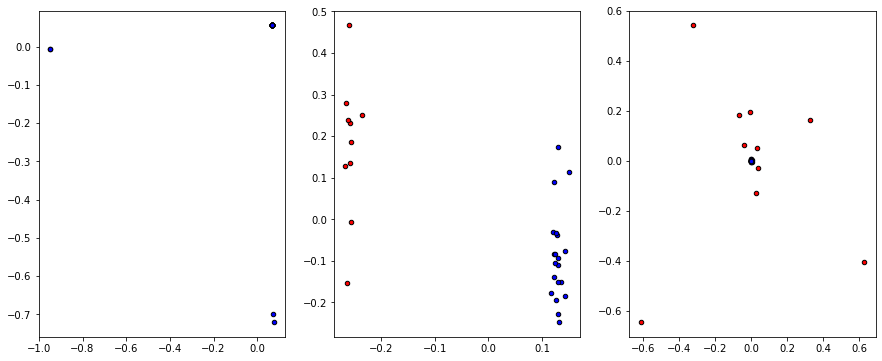

In [18]:
plt.figure(figsize=(15,6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)


kpca_result = KPCA(Gram)
kpca_result = pd.DataFrame(kpca_result[0])
reds = data_y == 0
blues = data_y == 1
ax1.scatter(kpca_result.iloc[reds.values, 0], kpca_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[blues.values, 0], kpca_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
J = np.outer(np.ones(shape=(n,1)),np.ones(shape=(n,1)))
Q = np.identity(n)-J/n
gram_xh = np.matmul(Q,gram_matrix,Q)
gram_y = Gram_discrete(data_y.values)
sir_result = GSIR(gram_y,gram_xh)
sir_result = pd.DataFrame(sir_result[0])
reds = data_y == 0
blues = data_y == 1
ax2.scatter(sir_result.iloc[reds.values, 0], sir_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[blues.values, 0], sir_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')

gram_xl = np.concatenate([np.ones((1,n)),gram_matrix])
gram_y = Gram_discrete(data_y.values,version="L")
sir_result = GSAVE(gram_y,gram_xl)
sir_result = pd.DataFrame(sir_result[0])
reds = data_y == 0
blues = data_y == 1
ax3.scatter(sir_result.iloc[reds.values, 0], sir_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax3.scatter(sir_result.iloc[blues.values, 0], sir_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')

In [12]:
data = pd.DataFrame(bubble_data_X)
data_y = pd.DataFrame(bubble_data_y)
sample = 30

sto_ind = np.random.randint(0,len(data),sample)
data_sto = data.iloc[sto_ind,:]
data_y = data_y.iloc[sto_ind]
n = len(data_sto)

start_time = time.time()
gram_matrix = get_gram(data_sto,kernel_A,shots=1000)
print("--- %s seconds ---" % (time.time() - start_time))

  0%|          | 0/100 [00:00<?, ?it/s]

--- 594.7860291004181 seconds ---


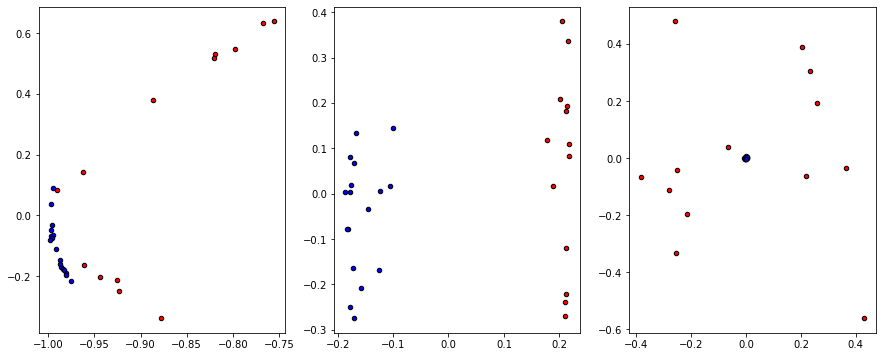

In [13]:
plt.figure(figsize=(15,6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)


kpca_result = KPCA(gram_matrix)
kpca_result = pd.DataFrame(kpca_result[0])
reds = data_y == 0
blues = data_y == 1
ax1.scatter(kpca_result.iloc[reds.values, 0], kpca_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[blues.values, 0], kpca_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
J = np.outer(np.ones(shape=(n,1)),np.ones(shape=(n,1)))
Q = np.identity(n)-J/n
gram_xh = np.matmul(Q,gram_matrix,Q)
gram_y = Gram_discrete(data_y.values)
sir_result = GSIR(gram_y,gram_xh)
sir_result = pd.DataFrame(sir_result[0])
reds = data_y == 0
blues = data_y == 1
ax2.scatter(sir_result.iloc[reds.values, 0], sir_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[blues.values, 0], sir_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')

gram_xl = np.concatenate([np.ones((1,n)),gram_matrix])
gram_y = Gram_discrete(data_y.values,version="L")
sir_result = GSAVE(gram_y,gram_xl)
sir_result = pd.DataFrame(sir_result[0])
reds = data_y == 0
blues = data_y == 1
ax3.scatter(sir_result.iloc[reds.values, 0], sir_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax3.scatter(sir_result.iloc[blues.values, 0], sir_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')

In [14]:
pen_digit = pd.read_csv("pendigits.txt",header=None)
x_pen = pen_digit.iloc[:,:16]/255*2*np.pi
y_pen = pen_digit.iloc[:,16:17]

In [15]:
x_pen0 = x_pen.iloc[(y_pen == 0).values,:]
x_pen6 = x_pen.iloc[(y_pen == 6).values,:]
x_pen9 = x_pen.iloc[(y_pen == 9).values,:]

x_pen069 = np.concatenate([x_pen0,x_pen6,x_pen9])
y_pen069 = [0 for i in range(len(x_pen0))]+[1 for i in range(len(x_pen6))]+[2 for i in range(len(x_pen9))]

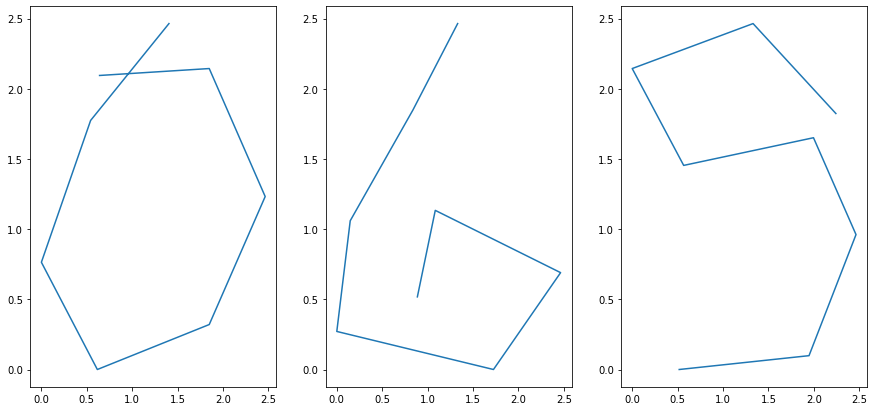

In [16]:
d=1
plt.figure(figsize=(15,7))
plt.subplot(131)
plt.plot(x_pen0.iloc[d,[i*2 for i in range(8)]],x_pen0.iloc[d,[i*2+1 for i in range(8)]])
plt.subplot(132)
plt.plot(x_pen6.iloc[d,[i*2 for i in range(8)]],x_pen6.iloc[d,[i*2+1 for i in range(8)]])
plt.subplot(133)
plt.plot(x_pen9.iloc[d,[i*2 for i in range(8)]],x_pen9.iloc[d,[i*2+1 for i in range(8)]])
plt.show()

In [17]:
data = pd.DataFrame(x_pen069)
data_y_orig = pd.DataFrame(y_pen069)
sample = 30

sto_ind = np.random.randint(0,len(data),sample)
data_sto = data.iloc[sto_ind,:]
data_y = data_y_orig.iloc[sto_ind]
n = len(data_sto)

In [175]:
start_time = time.time()
gram_matrix = get_gram(data_sto,kernel_A,shots=1000)
print("--- %s seconds ---" % (time.time() - start_time))

  0%|          | 0/100 [00:00<?, ?it/s]

--- 1350.7444994449615 seconds ---


In [176]:
gram_matrix_kernel_A = gram_matrix

<ipython-input-5-deeed46bf943>:33: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  U = np.matmul(data,data.T)


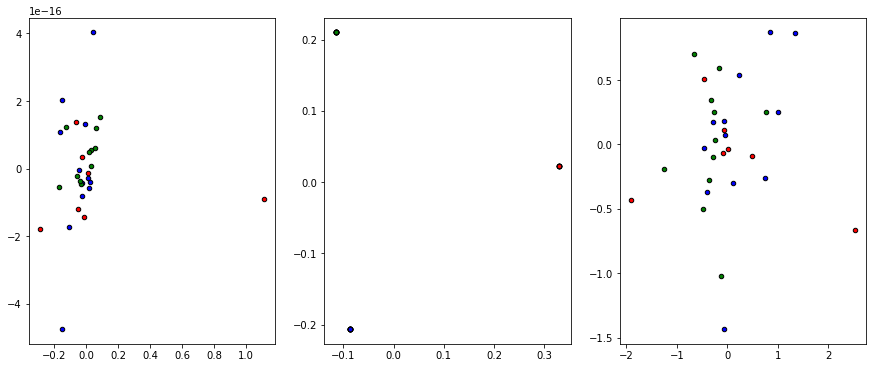

In [23]:
reds = data_y == 0
blues = data_y == 1
greens = data_y == 2

gram_gaussian_x = Gram_gaussian(data_sto,10)

kpca_result = KPCA(gram_gaussian_x)
kpca_result = pd.DataFrame(kpca_result[0])

J = np.outer(np.ones(shape=(n,1)),np.ones(shape=(n,1)))
Q = np.identity(n)-J/n
gram_xh = np.matmul(Q,gram_gaussian_x,Q)
gram_y = Gram_discrete(data_y.values)
sir_result = GSIR(gram_y,gram_xh)
sir_result = pd.DataFrame(sir_result[0])

gram_xl = np.concatenate([np.ones((1,n)),gram_gaussian_x])
gram_y = Gram_discrete(data_y.values,version="L")
save_result = GSAVE(gram_y,gram_xl)
save_result = pd.DataFrame(save_result[0])

plt.figure(figsize=(15,6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.scatter(kpca_result.iloc[reds.values, 0], kpca_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[blues.values, 0], kpca_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[greens.values, 0], kpca_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')

ax2.scatter(sir_result.iloc[reds.values, 0], sir_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[blues.values, 0], sir_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[greens.values, 0], sir_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')

ax3.scatter(save_result.iloc[reds.values, 0], save_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax3.scatter(save_result.iloc[blues.values, 0], save_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax3.scatter(save_result.iloc[greens.values, 0], save_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')
plt.show()

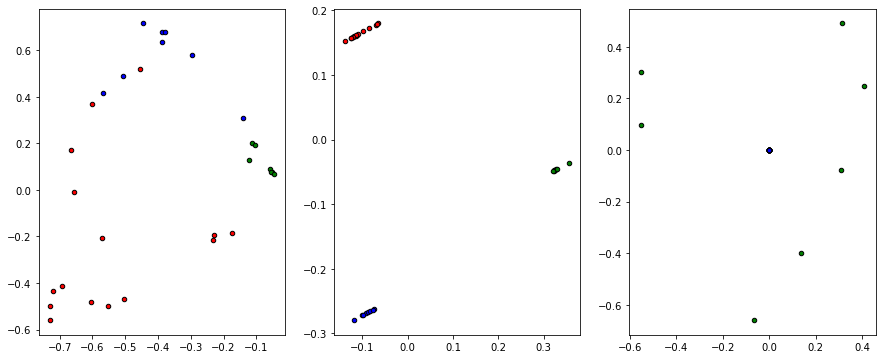

In [178]:
reds = data_y == 0
blues = data_y == 1
greens = data_y == 2

kpca_result = KPCA(gram_matrix)
kpca_result = pd.DataFrame(kpca_result[0])
J = np.outer(np.ones(shape=(n,1)),np.ones(shape=(n,1)))
Q = np.identity(n)-J/n
gram_xh = np.matmul(Q,gram_matrix,Q)
gram_y = Gram_discrete(data_y.values)
sir_result = GSIR(gram_y,gram_xh)
sir_result = pd.DataFrame(sir_result[0])
gram_xl = np.concatenate([np.ones((1,n)),gram_matrix])
gram_y = Gram_discrete(data_y.values,version="L")
save_result = GSAVE(gram_y,gram_xl)
save_result = pd.DataFrame(save_result[0])

plt.figure(figsize=(15,6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.scatter(kpca_result.iloc[reds.values, 0], kpca_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[blues.values, 0], kpca_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[greens.values, 0], kpca_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')

ax2.scatter(sir_result.iloc[reds.values, 0], sir_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[blues.values, 0], sir_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[greens.values, 0], sir_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')

ax3.scatter(save_result.iloc[reds.values, 0], save_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax3.scatter(save_result.iloc[blues.values, 0], save_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax3.scatter(save_result.iloc[greens.values, 0], save_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')
plt.show()

In [179]:
start_time = time.time()
gram_matrix = get_gram(data_sto,kernel_B,shots=1000)
print("--- %s seconds ---" % (time.time() - start_time))

  0%|          | 0/100 [00:00<?, ?it/s]

--- 2681.8550736904144 seconds ---


In [180]:
gram_matrix_kernel_B = gram_matrix

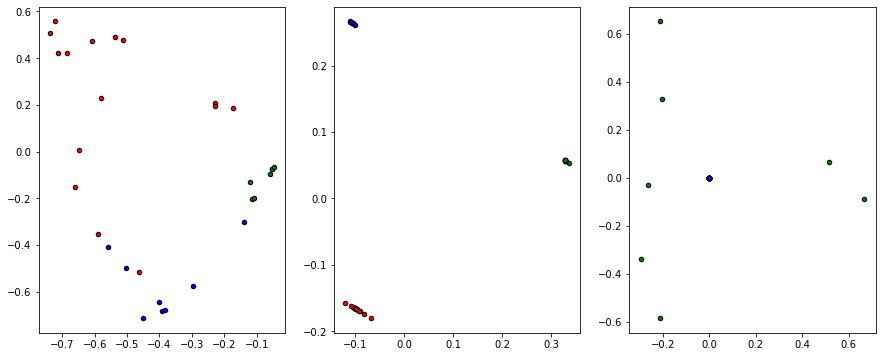

In [181]:
reds = data_y == 0
blues = data_y == 1
greens = data_y == 2

kpca_result = KPCA(gram_matrix)
kpca_result = pd.DataFrame(kpca_result[0])
J = np.outer(np.ones(shape=(n,1)),np.ones(shape=(n,1)))
Q = np.identity(n)-J/n
gram_xh = np.matmul(Q,gram_matrix,Q)
gram_y = Gram_discrete(data_y.values)
sir_result = GSIR(gram_y,gram_xh)
sir_result = pd.DataFrame(sir_result[0])
gram_xl = np.concatenate([np.ones((1,n)),gram_matrix])
gram_y = Gram_discrete(data_y.values,version="L")
save_result = GSAVE(gram_y,gram_xl)
save_result = pd.DataFrame(save_result[0])

plt.figure(figsize=(15,6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.scatter(kpca_result.iloc[reds.values, 0], kpca_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[blues.values, 0], kpca_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[greens.values, 0], kpca_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')

ax2.scatter(sir_result.iloc[reds.values, 0], sir_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[blues.values, 0], sir_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[greens.values, 0], sir_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')

ax3.scatter(save_result.iloc[reds.values, 0], save_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax3.scatter(save_result.iloc[blues.values, 0], save_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax3.scatter(save_result.iloc[greens.values, 0], save_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')
plt.show()

In [182]:
start_time = time.time()
gram_matrix = get_gram(data_sto,kernel_C,shots=1000)
print("--- %s seconds ---" % (time.time() - start_time))

  0%|          | 0/100 [00:00<?, ?it/s]

--- 2250.630175590515 seconds ---


In [183]:
gram_matrix_kernel_C = gram_matrix

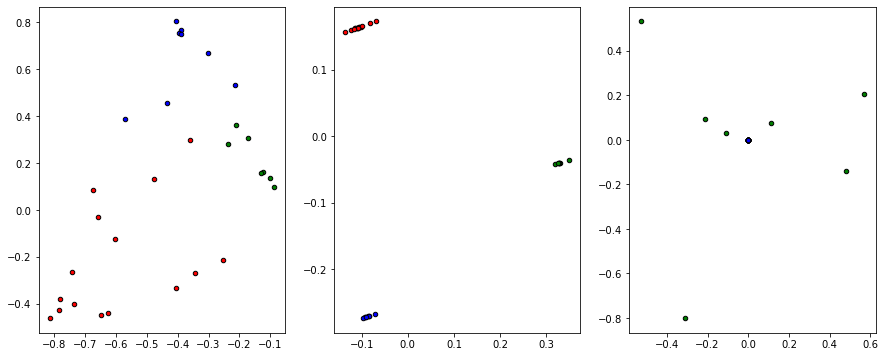

In [184]:
reds = data_y == 0
blues = data_y == 1
greens = data_y == 2

kpca_result = KPCA(gram_matrix)
kpca_result = pd.DataFrame(kpca_result[0])
J = np.outer(np.ones(shape=(n,1)),np.ones(shape=(n,1)))
Q = np.identity(n)-J/n
gram_xh = np.matmul(Q,gram_matrix,Q)
gram_y = Gram_discrete(data_y.values)
sir_result = GSIR(gram_y,gram_xh)
sir_result = pd.DataFrame(sir_result[0])
gram_xl = np.concatenate([np.ones((1,n)),gram_matrix])
gram_y = Gram_discrete(data_y.values,version="L")
save_result = GSAVE(gram_y,gram_xl)
save_result = pd.DataFrame(save_result[0])

plt.figure(figsize=(15,6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.scatter(kpca_result.iloc[reds.values, 0], kpca_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[blues.values, 0], kpca_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[greens.values, 0], kpca_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')

ax2.scatter(sir_result.iloc[reds.values, 0], sir_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[blues.values, 0], sir_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[greens.values, 0], sir_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')

ax3.scatter(save_result.iloc[reds.values, 0], save_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax3.scatter(save_result.iloc[blues.values, 0], save_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax3.scatter(save_result.iloc[greens.values, 0], save_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')
plt.show()

In [185]:
start_time = time.time()
gram_matrix = get_gram(data_sto,kernel_D,shots=1000)
print("--- %s seconds ---" % (time.time() - start_time))

  0%|          | 0/100 [00:00<?, ?it/s]

--- 2222.607407093048 seconds ---


In [186]:
gram_matrix_kernel_D = gram_matrix

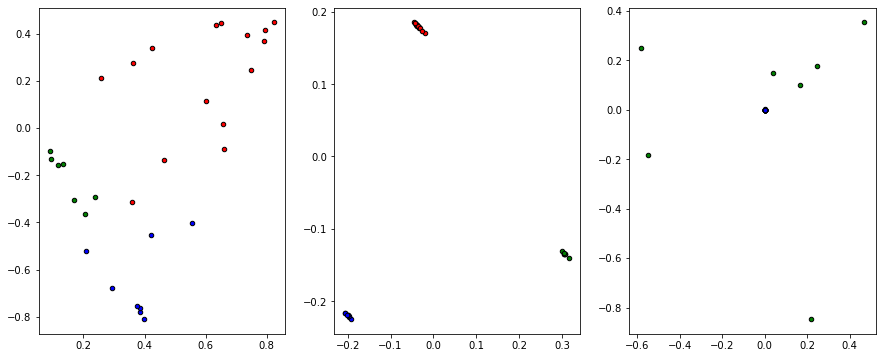

In [187]:
reds = data_y == 0
blues = data_y == 1
greens = data_y == 2

kpca_result = KPCA(gram_matrix)
kpca_result = pd.DataFrame(kpca_result[0])
J = np.outer(np.ones(shape=(n,1)),np.ones(shape=(n,1)))
Q = np.identity(n)-J/n
gram_xh = np.matmul(Q,gram_matrix,Q)
gram_y = Gram_discrete(data_y.values)
sir_result = GSIR(gram_y,gram_xh)
sir_result = pd.DataFrame(sir_result[0])
gram_xl = np.concatenate([np.ones((1,n)),gram_matrix])
gram_y = Gram_discrete(data_y.values,version="L")
save_result = GSAVE(gram_y,gram_xl)
save_result = pd.DataFrame(save_result[0])

plt.figure(figsize=(15,6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.scatter(kpca_result.iloc[reds.values, 0], kpca_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[blues.values, 0], kpca_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[greens.values, 0], kpca_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')

ax2.scatter(sir_result.iloc[reds.values, 0], sir_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[blues.values, 0], sir_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[greens.values, 0], sir_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')

ax3.scatter(save_result.iloc[reds.values, 0], save_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax3.scatter(save_result.iloc[blues.values, 0], save_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax3.scatter(save_result.iloc[greens.values, 0], save_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')
plt.show()

In [188]:
start_time = time.time()
gram_matrix = get_gram(data_sto,kernel_E,shots=1000)
print("--- %s seconds ---" % (time.time() - start_time))

  0%|          | 0/100 [00:00<?, ?it/s]

--- 4980.293625116348 seconds ---


In [189]:
gram_matrix_kernel_E = gram_matrix

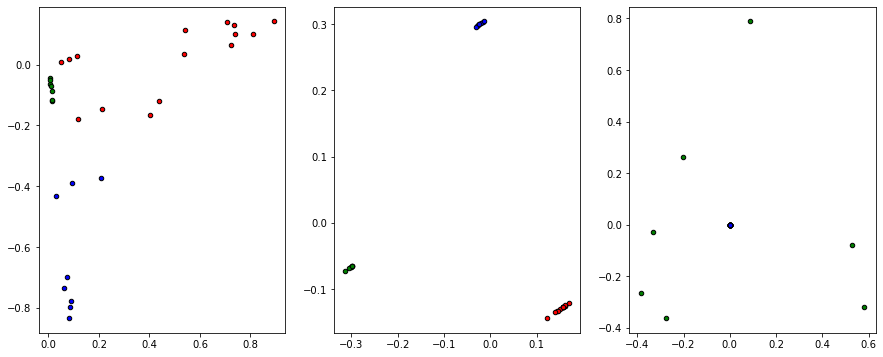

In [190]:
reds = data_y == 0
blues = data_y == 1
greens = data_y == 2

kpca_result = KPCA(gram_matrix)
kpca_result = pd.DataFrame(kpca_result[0])
J = np.outer(np.ones(shape=(n,1)),np.ones(shape=(n,1)))
Q = np.identity(n)-J/n
gram_xh = np.matmul(Q,gram_matrix,Q)
gram_y = Gram_discrete(data_y.values)
sir_result = GSIR(gram_y,gram_xh)
sir_result = pd.DataFrame(sir_result[0])
gram_xl = np.concatenate([np.ones((1,n)),gram_matrix])
gram_y = Gram_discrete(data_y.values,version="L")
save_result = GSAVE(gram_y,gram_xl)
save_result = pd.DataFrame(save_result[0])

plt.figure(figsize=(15,6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.scatter(kpca_result.iloc[reds.values, 0], kpca_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[blues.values, 0], kpca_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[greens.values, 0], kpca_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')

ax2.scatter(sir_result.iloc[reds.values, 0], sir_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[blues.values, 0], sir_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[greens.values, 0], sir_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')

ax3.scatter(save_result.iloc[reds.values, 0], save_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax3.scatter(save_result.iloc[blues.values, 0], save_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax3.scatter(save_result.iloc[greens.values, 0], save_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')
plt.show()

In [191]:
start_time = time.time()
gram_matrix = get_gram(data_sto,kernel_F,shots=1000)
print("--- %s seconds ---" % (time.time() - start_time))

  0%|          | 0/100 [00:00<?, ?it/s]

--- 1120.5168282985687 seconds ---


In [192]:
gram_matrix_kernel_F = gram_matrix

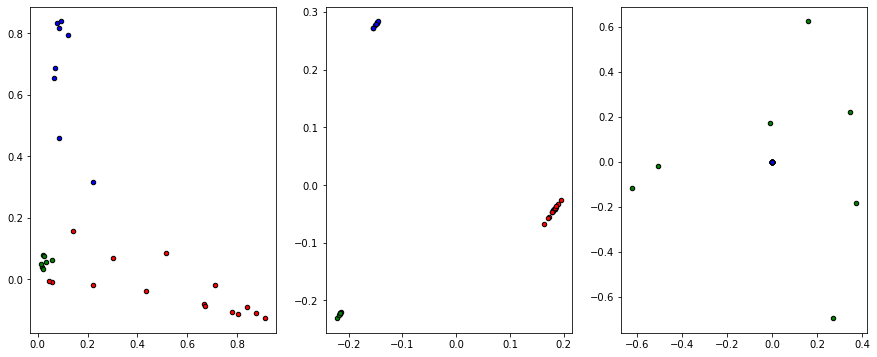

In [193]:
reds = data_y == 0
blues = data_y == 1
greens = data_y == 2

kpca_result = KPCA(gram_matrix)
kpca_result = pd.DataFrame(kpca_result[0])
J = np.outer(np.ones(shape=(n,1)),np.ones(shape=(n,1)))
Q = np.identity(n)-J/n
gram_xh = np.matmul(Q,gram_matrix,Q)
gram_y = Gram_discrete(data_y.values)
sir_result = GSIR(gram_y,gram_xh)
sir_result = pd.DataFrame(sir_result[0])
gram_xl = np.concatenate([np.ones((1,n)),gram_matrix])
gram_y = Gram_discrete(data_y.values,version="L")
save_result = GSAVE(gram_y,gram_xl)
save_result = pd.DataFrame(save_result[0])

plt.figure(figsize=(15,6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.scatter(kpca_result.iloc[reds.values, 0], kpca_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[blues.values, 0], kpca_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[greens.values, 0], kpca_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')

ax2.scatter(sir_result.iloc[reds.values, 0], sir_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[blues.values, 0], sir_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[greens.values, 0], sir_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')

ax3.scatter(save_result.iloc[reds.values, 0], save_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax3.scatter(save_result.iloc[blues.values, 0], save_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax3.scatter(save_result.iloc[greens.values, 0], save_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')
plt.show()

In [194]:
start_time = time.time()
gram_matrix = get_gram(data_sto,kernel_G,shots=1000)
print("--- %s seconds ---" % (time.time() - start_time))

  0%|          | 0/100 [00:00<?, ?it/s]

--- 1546.1645567417145 seconds ---


In [195]:
gram_matrix_kernel_G = gram_matrix

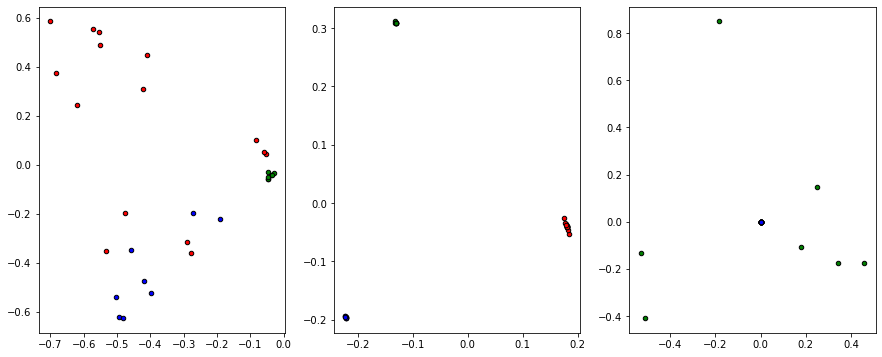

In [196]:
reds = data_y == 0
blues = data_y == 1
greens = data_y == 2

kpca_result = KPCA(gram_matrix)
kpca_result = pd.DataFrame(kpca_result[0])
J = np.outer(np.ones(shape=(n,1)),np.ones(shape=(n,1)))
Q = np.identity(n)-J/n
gram_xh = np.matmul(Q,gram_matrix,Q)
gram_y = Gram_discrete(data_y.values)
sir_result = GSIR(gram_y,gram_xh)
sir_result = pd.DataFrame(sir_result[0])
gram_xl = np.concatenate([np.ones((1,n)),gram_matrix])
gram_y = Gram_discrete(data_y.values,version="L")
save_result = GSAVE(gram_y,gram_xl)
save_result = pd.DataFrame(save_result[0])

plt.figure(figsize=(15,6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.scatter(kpca_result.iloc[reds.values, 0], kpca_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[blues.values, 0], kpca_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[greens.values, 0], kpca_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')

ax2.scatter(sir_result.iloc[reds.values, 0], sir_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[blues.values, 0], sir_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[greens.values, 0], sir_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')

ax3.scatter(save_result.iloc[reds.values, 0], save_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax3.scatter(save_result.iloc[blues.values, 0], save_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax3.scatter(save_result.iloc[greens.values, 0], save_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')
plt.show()

In [197]:
start_time = time.time()
gram_matrix = get_gram(data_sto,kernel_H,shots=1000)
print("--- %s seconds ---" % (time.time() - start_time))

  0%|          | 0/100 [00:00<?, ?it/s]

--- 1318.314615726471 seconds ---


In [198]:
gram_matrix_kernel_H = gram_matrix

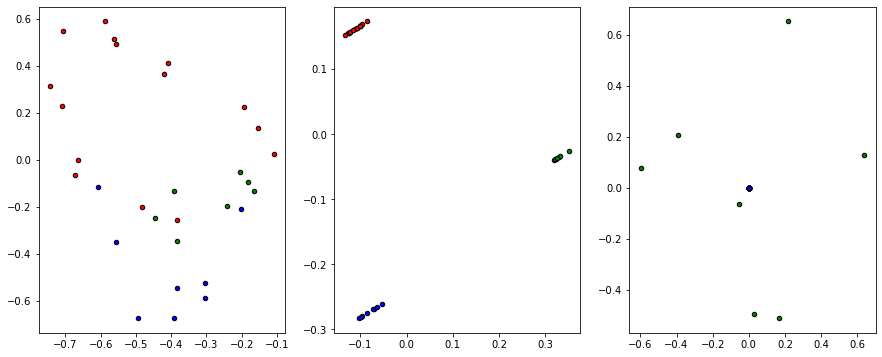

In [199]:
reds = data_y == 0
blues = data_y == 1
greens = data_y == 2

kpca_result = KPCA(gram_matrix)
kpca_result = pd.DataFrame(kpca_result[0])
J = np.outer(np.ones(shape=(n,1)),np.ones(shape=(n,1)))
Q = np.identity(n)-J/n
gram_xh = np.matmul(Q,gram_matrix,Q)
gram_y = Gram_discrete(data_y.values)
sir_result = GSIR(gram_y,gram_xh)
sir_result = pd.DataFrame(sir_result[0])
gram_xl = np.concatenate([np.ones((1,n)),gram_matrix])
gram_y = Gram_discrete(data_y.values,version="L")
save_result = GSAVE(gram_y,gram_xl)
save_result = pd.DataFrame(save_result[0])

plt.figure(figsize=(15,6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.scatter(kpca_result.iloc[reds.values, 0], kpca_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[blues.values, 0], kpca_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[greens.values, 0], kpca_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')

ax2.scatter(sir_result.iloc[reds.values, 0], sir_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[blues.values, 0], sir_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[greens.values, 0], sir_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')

ax3.scatter(save_result.iloc[reds.values, 0], save_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax3.scatter(save_result.iloc[blues.values, 0], save_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax3.scatter(save_result.iloc[greens.values, 0], save_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')
plt.show()

In [200]:
start_time = time.time()
gram_matrix = get_gram(data_sto,kernel_I,shots=1000)
print("--- %s seconds ---" % (time.time() - start_time))
gram_matrix_kernel_I = gram_matrix

  0%|          | 0/100 [00:00<?, ?it/s]

--- 1200.8604609966278 seconds ---


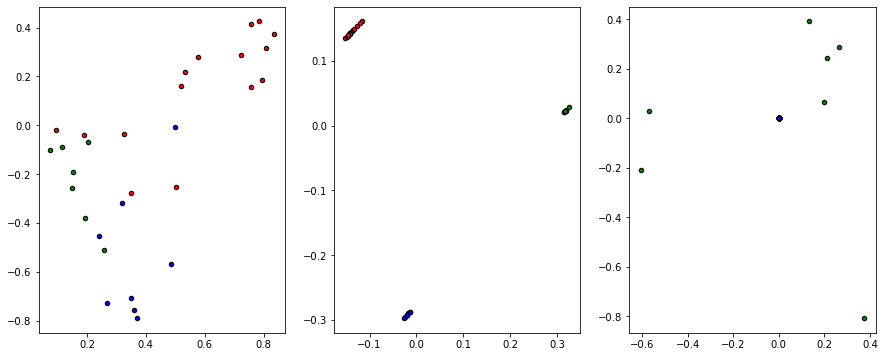

In [201]:
reds = data_y == 0
blues = data_y == 1
greens = data_y == 2

kpca_result = KPCA(gram_matrix)
kpca_result = pd.DataFrame(kpca_result[0])
J = np.outer(np.ones(shape=(n,1)),np.ones(shape=(n,1)))
Q = np.identity(n)-J/n
gram_xh = np.matmul(Q,gram_matrix,Q)
gram_y = Gram_discrete(data_y.values)
sir_result = GSIR(gram_y,gram_xh)
sir_result = pd.DataFrame(sir_result[0])
gram_xl = np.concatenate([np.ones((1,n)),gram_matrix])
gram_y = Gram_discrete(data_y.values,version="L")
save_result = GSAVE(gram_y,gram_xl)
save_result = pd.DataFrame(save_result[0])

plt.figure(figsize=(15,6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.scatter(kpca_result.iloc[reds.values, 0], kpca_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[blues.values, 0], kpca_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[greens.values, 0], kpca_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')

ax2.scatter(sir_result.iloc[reds.values, 0], sir_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[blues.values, 0], sir_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[greens.values, 0], sir_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')

ax3.scatter(save_result.iloc[reds.values, 0], save_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax3.scatter(save_result.iloc[blues.values, 0], save_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax3.scatter(save_result.iloc[greens.values, 0], save_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')
plt.show()

In [204]:
start_time = time.time()
gram_matrix = get_gram(data_sto,kernel_J,shots=1000)
print("--- %s seconds ---" % (time.time() - start_time))
gram_matrix_kernel_J = gram_matrix

  0%|          | 0/100 [00:00<?, ?it/s]

--- 1725.3568036556244 seconds ---


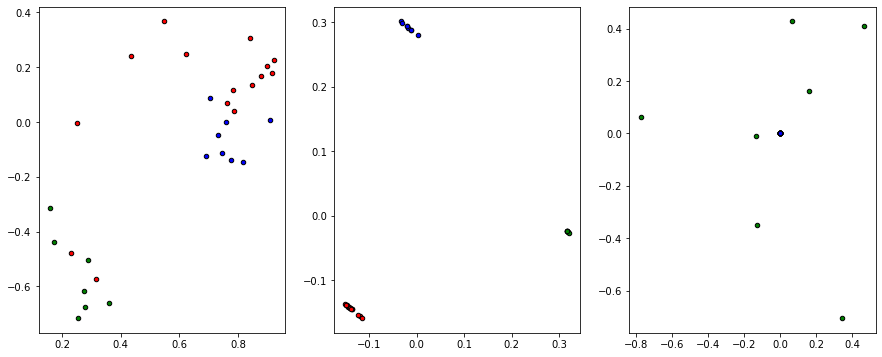

In [205]:
reds = data_y == 0
blues = data_y == 1
greens = data_y == 2

kpca_result = KPCA(gram_matrix)
kpca_result = pd.DataFrame(kpca_result[0])
J = np.outer(np.ones(shape=(n,1)),np.ones(shape=(n,1)))
Q = np.identity(n)-J/n
gram_xh = np.matmul(Q,gram_matrix,Q)
gram_y = Gram_discrete(data_y.values)
sir_result = GSIR(gram_y,gram_xh)
sir_result = pd.DataFrame(sir_result[0])
gram_xl = np.concatenate([np.ones((1,n)),gram_matrix])
gram_y = Gram_discrete(data_y.values,version="L")
save_result = GSAVE(gram_y,gram_xl)
save_result = pd.DataFrame(save_result[0])

plt.figure(figsize=(15,6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.scatter(kpca_result.iloc[reds.values, 0], kpca_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[blues.values, 0], kpca_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[greens.values, 0], kpca_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')

ax2.scatter(sir_result.iloc[reds.values, 0], sir_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[blues.values, 0], sir_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[greens.values, 0], sir_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')

ax3.scatter(save_result.iloc[reds.values, 0], save_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax3.scatter(save_result.iloc[blues.values, 0], save_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax3.scatter(save_result.iloc[greens.values, 0], save_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')
plt.show()

In [206]:
start_time = time.time()
gram_matrix = get_gram(data_sto,kernel_K,shots=1000)
print("--- %s seconds ---" % (time.time() - start_time))
gram_matrix_kernel_K = gram_matrix

  0%|          | 0/100 [00:00<?, ?it/s]

--- 2288.3434295654297 seconds ---


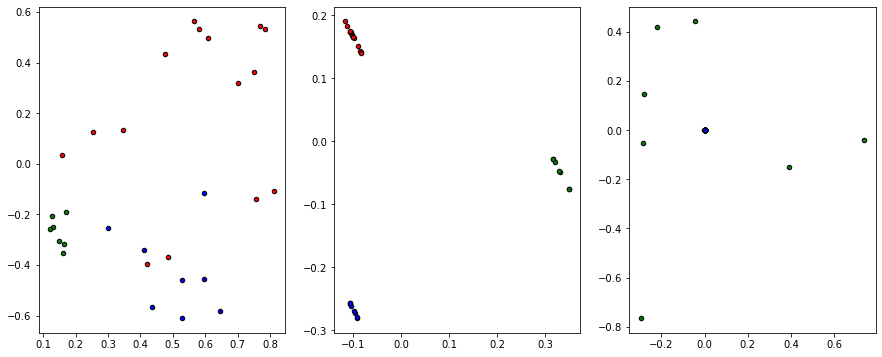

In [207]:
reds = data_y == 0
blues = data_y == 1
greens = data_y == 2

kpca_result = KPCA(gram_matrix)
kpca_result = pd.DataFrame(kpca_result[0])
J = np.outer(np.ones(shape=(n,1)),np.ones(shape=(n,1)))
Q = np.identity(n)-J/n
gram_xh = np.matmul(Q,gram_matrix,Q)
gram_y = Gram_discrete(data_y.values)
sir_result = GSIR(gram_y,gram_xh)
sir_result = pd.DataFrame(sir_result[0])
gram_xl = np.concatenate([np.ones((1,n)),gram_matrix])
gram_y = Gram_discrete(data_y.values,version="L")
save_result = GSAVE(gram_y,gram_xl)
save_result = pd.DataFrame(save_result[0])

plt.figure(figsize=(15,6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.scatter(kpca_result.iloc[reds.values, 0], kpca_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[blues.values, 0], kpca_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[greens.values, 0], kpca_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')

ax2.scatter(sir_result.iloc[reds.values, 0], sir_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[blues.values, 0], sir_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[greens.values, 0], sir_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')

ax3.scatter(save_result.iloc[reds.values, 0], save_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
ax3.scatter(save_result.iloc[blues.values, 0], save_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
ax3.scatter(save_result.iloc[greens.values, 0], save_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')
plt.show()

In [209]:
pd.DataFrame(gram_matrix_kernel_A).to_csv("gram_matrix_kernel_A.csv")
pd.DataFrame(gram_matrix_kernel_B).to_csv("gram_matrix_kernel_B.csv")
pd.DataFrame(gram_matrix_kernel_C).to_csv("gram_matrix_kernel_C.csv")
pd.DataFrame(gram_matrix_kernel_D).to_csv("gram_matrix_kernel_D.csv")
pd.DataFrame(gram_matrix_kernel_E).to_csv("gram_matrix_kernel_E.csv")
pd.DataFrame(gram_matrix_kernel_F).to_csv("gram_matrix_kernel_F.csv")
pd.DataFrame(gram_matrix_kernel_G).to_csv("gram_matrix_kernel_G.csv")
pd.DataFrame(gram_matrix_kernel_H).to_csv("gram_matrix_kernel_H.csv")
pd.DataFrame(gram_matrix_kernel_I).to_csv("gram_matrix_kernel_I.csv")
pd.DataFrame(gram_matrix_kernel_J).to_csv("gram_matrix_kernel_J.csv")
pd.DataFrame(gram_matrix_kernel_K).to_csv("gram_matrix_kernel_K.csv")

In [ ]:
pd.DataFrame(gram_matrix_kernel_A).to_csv("gram_matrix_kernel_A.csv")
pd.DataFrame(gram_matrix_kernel_B).to_csv("gram_matrix_kernel_B.csv")
pd.DataFrame(gram_matrix_kernel_C).to_csv("gram_matrix_kernel_C.csv")
pd.DataFrame(gram_matrix_kernel_D).to_csv("gram_matrix_kernel_D.csv")
pd.DataFrame(gram_matrix_kernel_E).to_csv("gram_matrix_kernel_E.csv")
pd.DataFrame(gram_matrix_kernel_F).to_csv("gram_matrix_kernel_F.csv")

In [18]:
data = pd.DataFrame(x_pen069)
data_y = pd.DataFrame(y_pen069)
sample = 30

sto_ind = np.random.randint(0,len(data),sample)
sto_ind = np.array([1584, 1666,  259, 1236,  412,  829, 1210, 2145, 1135,  928,  513,
       1170, 1962, 1611, 1963, 1174, 1217,   58, 1030,  902,  551, 2188,
       1083,  167, 1122,  618, 1412,  890,  308, 1592])
data_sto = data.iloc[sto_ind,:]
data_y = data_y.iloc[sto_ind]
n = len(data_sto)

reds = data_y == 0
blues = data_y == 1
greens = data_y == 2


In [22]:
start_time = time.time()
gram_matrix1 = Gram_gaussian(data_sto,10)
print("--- %s seconds ---" % (time.time() - start_time))

J = np.outer(np.ones(shape=(n,1)),np.ones(shape=(n,1)))
Q = np.identity(n)-J/n
gram_xh = np.matmul(Q,gram_gaussian_x,Q)
gram_y = Gram_discrete(data_y.values)

start_time = time.time()
gram_matrix2 = get_gram(data_sto,kernel_A,shots=1000)
print("--- %s seconds ---" % (time.time() - start_time))
start_timeB = time.time()
gram_matrix3 = get_gram(data_sto,kernel_B,shots=1000)
print("--- %s seconds ---" % (time.time() - start_time))
start_timeC = time.time()
gram_matrix4 = get_gram(data_sto,kernel_C,shots=1000)
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
gram_matrix5 = get_gram(data_sto,kernel_D,shots=1000)
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
gram_matrix6 = get_gram(data_sto,kernel_E,shots=1000)
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
gram_matrix7 = get_gram(data_sto,kernel_F,shots=1000)
print("--- %s seconds ---" % (time.time() - start_time))


--- 0.005491018295288086 seconds ---


<ipython-input-5-deeed46bf943>:33: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  U = np.matmul(data,data.T)


  0%|          | 0/100 [00:00<?, ?it/s]

--- 1309.3220672607422 seconds ---


  0%|          | 0/100 [00:00<?, ?it/s]

--- 4552.268711805344 seconds ---


  0%|          | 0/100 [00:00<?, ?it/s]

--- 6838.826630830765 seconds ---


  0%|          | 0/100 [00:00<?, ?it/s]

--- 2367.96032166481 seconds ---


  0%|          | 0/100 [00:00<?, ?it/s]

--- 4655.291732549667 seconds ---


  0%|          | 0/100 [00:00<?, ?it/s]

--- 1108.6563353538513 seconds ---


In [73]:
gram_matrix1.to_csv("pendigit/gram_matrix_Gaussian.csv")
pd.DataFrame(gram_matrix2).to_csv("pendigit/gram_matrix_A.csv")
pd.DataFrame(gram_matrix3).to_csv("pendigit/gram_matrix_B.csv")
pd.DataFrame(gram_matrix4).to_csv("pendigit/gram_matrix_C.csv")
pd.DataFrame(gram_matrix5).to_csv("pendigit/gram_matrix_D.csv")
pd.DataFrame(gram_matrix6).to_csv("pendigit/gram_matrix_E.csv")
pd.DataFrame(gram_matrix7).to_csv("pendigit/gram_matrix_F.csv")

In [19]:
gram_matrix_A = pd.read_csv("pendigit/gram_matrix_A.csv").iloc[:,1:].values
gram_matrix_B = pd.read_csv("pendigit/gram_matrix_B.csv").iloc[:,1:].values
gram_matrix_C = pd.read_csv("pendigit/gram_matrix_C.csv").iloc[:,1:].values
gram_matrix_D = pd.read_csv("pendigit/gram_matrix_D.csv").iloc[:,1:].values
gram_matrix_E = pd.read_csv("pendigit/gram_matrix_E.csv").iloc[:,1:].values
gram_matrix_F = pd.read_csv("pendigit/gram_matrix_F.csv").iloc[:,1:].values

In [20]:
start_time = time.time()
gram_matrix1 = Gram_gaussian(data_sto,10)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.016500234603881836 seconds ---


<ipython-input-5-999df6046543>:33: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  U = np.matmul(data,data.T)


In [21]:
alphabet_index = ["A","B","C","D","E","F"]

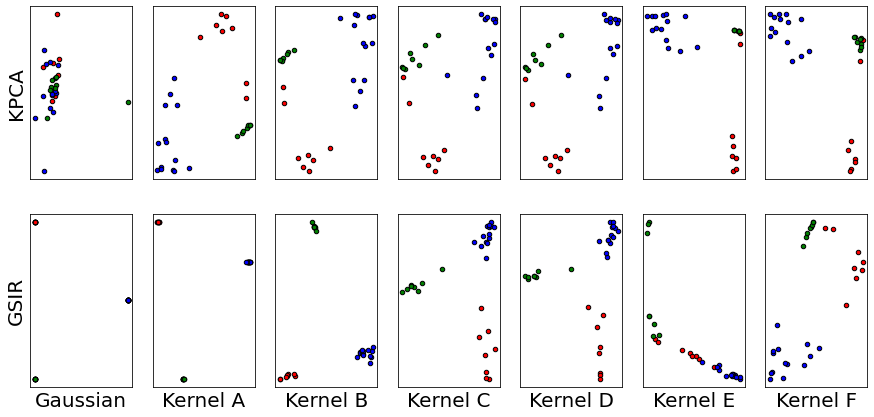

In [25]:
n = gram_matrix_A.shape[0]
J = np.outer(np.ones(shape=(n,1)),np.ones(shape=(n,1)))
Q = np.identity(n)-J/n
gram_y = Gram_discrete(data_y.values)
plot_title = ["Gaussian","Kernel A","Kernel B","Kernel C","Kernel D","Kernel E","Kernel F"]

plt.figure(figsize=(15,7))

plt.subplot(2,7,1)
G = eval(str("gram_matrix")+str(1))
kpca_result = KPCA(G)
kpca_result = pd.DataFrame(kpca_result[0])
plt.scatter(kpca_result.iloc[reds.values, 0], kpca_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
plt.scatter(kpca_result.iloc[blues.values, 0], kpca_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
plt.scatter(kpca_result.iloc[greens.values, 0], kpca_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')
plt.ylabel("KPCA", fontsize=20)
plt.xticks([], [])
plt.yticks([], [])
    
for i in range(6):

    plt.subplot(2,7,i+2)
    G = eval(str("gram_matrix_")+str(alphabet_index[i]))
    kpca_result = KPCA(G)
    kpca_result = pd.DataFrame(kpca_result[0])
    plt.scatter(kpca_result.iloc[reds.values, 0], kpca_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
    plt.scatter(kpca_result.iloc[blues.values, 0], kpca_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
    plt.scatter(kpca_result.iloc[greens.values, 0], kpca_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')
    plt.xticks([], [])
    plt.yticks([], [])
    
comp = 0.001
plt.subplot(2,7,8)
G = eval(str("gram_matrix")+str(1))
gram_xh = np.matmul(Q,G,Q)
sir_result = GSIR(gram_y,gram_xh,comp)
sir_result = pd.DataFrame(sir_result[0])

plt.scatter(sir_result.iloc[reds.values, 0],   sir_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
plt.scatter(sir_result.iloc[blues.values, 0],  sir_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
plt.scatter(sir_result.iloc[greens.values, 0], sir_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')
plt.xlabel("Gaussian", fontsize=20)
plt.ylabel("GSIR", fontsize=20)
plt.xticks([], [])
plt.yticks([], [])
    
for i in range(6):
    plt.subplot(2,7,i+9)
    G = eval(str("gram_matrix_")+str(alphabet_index[i]))
    gram_xh = np.matmul(Q,G,Q)
    sir_result = GSIR(gram_y,gram_xh,comp)
    sir_result = pd.DataFrame(sir_result[0])

    plt.scatter(sir_result.iloc[reds.values, 0],   sir_result.iloc[reds.values, 1], c="red",s=20, edgecolor='k')
    plt.scatter(sir_result.iloc[blues.values, 0],  sir_result.iloc[blues.values, 1], c="blue",s=20, edgecolor='k')
    plt.scatter(sir_result.iloc[greens.values, 0], sir_result.iloc[greens.values, 1], c="green",s=20, edgecolor='k')
    plt.xticks([], [])
    plt.yticks([], [])
    plt.xlabel(plot_title[i+1], fontsize=20)


In [14]:
sto_test_ind = np.random.randint(0,len(data),20)
sto_test_ind = np.array([1951,  419,  734, 2208, 1794,  379,  438,  768,  110,  878, 1908,
       2031, 1328, 1935, 1068,  539, 1319, 1808,  407, 1055])
data_sto_test = data.iloc[sto_test_ind,:]
data_y_test = data_y_orig.iloc[sto_test_ind]
n = len(data_sto_test)

In [111]:
gram_test_A = get_test_gram(data_sto,data_sto_test,kernel_A,100)
gram_test_B = get_test_gram(data_sto,data_sto_test,kernel_B,100)
gram_test_C = get_test_gram(data_sto,data_sto_test,kernel_C,100)
gram_test_D = get_test_gram(data_sto,data_sto_test,kernel_D,100)
gram_test_E = get_test_gram(data_sto,data_sto_test,kernel_E,100)
gram_test_F = get_test_gram(data_sto,data_sto_test,kernel_F,100)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [76]:
pd.DataFrame(gram_test_A).to_csv("pendigit/gram_test_A.csv")
pd.DataFrame(gram_test_B).to_csv("pendigit/gram_test_B.csv")
pd.DataFrame(gram_test_C).to_csv("pendigit/gram_test_C.csv")
pd.DataFrame(gram_test_D).to_csv("pendigit/gram_test_D.csv")
pd.DataFrame(gram_test_E).to_csv("pendigit/gram_test_E.csv")
pd.DataFrame(gram_test_F).to_csv("pendigit/gram_test_F.csv")

In [9]:
gram_test_A = pd.read_csv("pendigit/gram_test_A.csv").iloc[:,1:].values
gram_test_B = pd.read_csv("pendigit/gram_test_B.csv").iloc[:,1:].values
gram_test_C = pd.read_csv("pendigit/gram_test_C.csv").iloc[:,1:].values
gram_test_D = pd.read_csv("pendigit/gram_test_D.csv").iloc[:,1:].values
gram_test_E = pd.read_csv("pendigit/gram_test_E.csv").iloc[:,1:].values
gram_test_F = pd.read_csv("pendigit/gram_test_F.csv").iloc[:,1:].values